### Setup

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

from setup_paths import MODELS_PATH, FIGURES_PATH
import visu
import visu_3d

sizes_short = [1] + [16*x for x in range(1, 17)]
sizes_long = ([1]
            + [16*x for x in range(1, 17)]
            + [512, 1024, 1536]
            + [1024*x for x in range(2, 16)] + [16376])
sizes_long = [1] + list(filter(lambda x: x%64 == 0, sizes_long)) + [16376]

The final measurements used:
* v8_O3: simple -O3 release measurement
* v9_O3: -g3 debug instrumentation and -O3 release measurement
* v10_O0: simple -O0 release measurement
* v11_O0: -g3 debug instrumentation -O0 debug measurement
* v12_Osize: simple -Osize release measurement
* v13_Ofast: simple -Ofast release measurement

### Difference (2D and 3D) between the optimization

After checking for most of the edge cases (clk (60, 60) and (480, 60), all mems, cache none and id), the results were similar each time, latency is almost halved, but no difference in maximum datarate

When checking all 4 final measuremenet (['v10_O0', 'v8_O3', 'v12_Osize', 'v13_Ofast']), without cache the datarate in the Ofast case gets slower. This is because of the M7 part slowing down.

With cache, the optimized measurements are practically the same, the O0 is naturally slower.

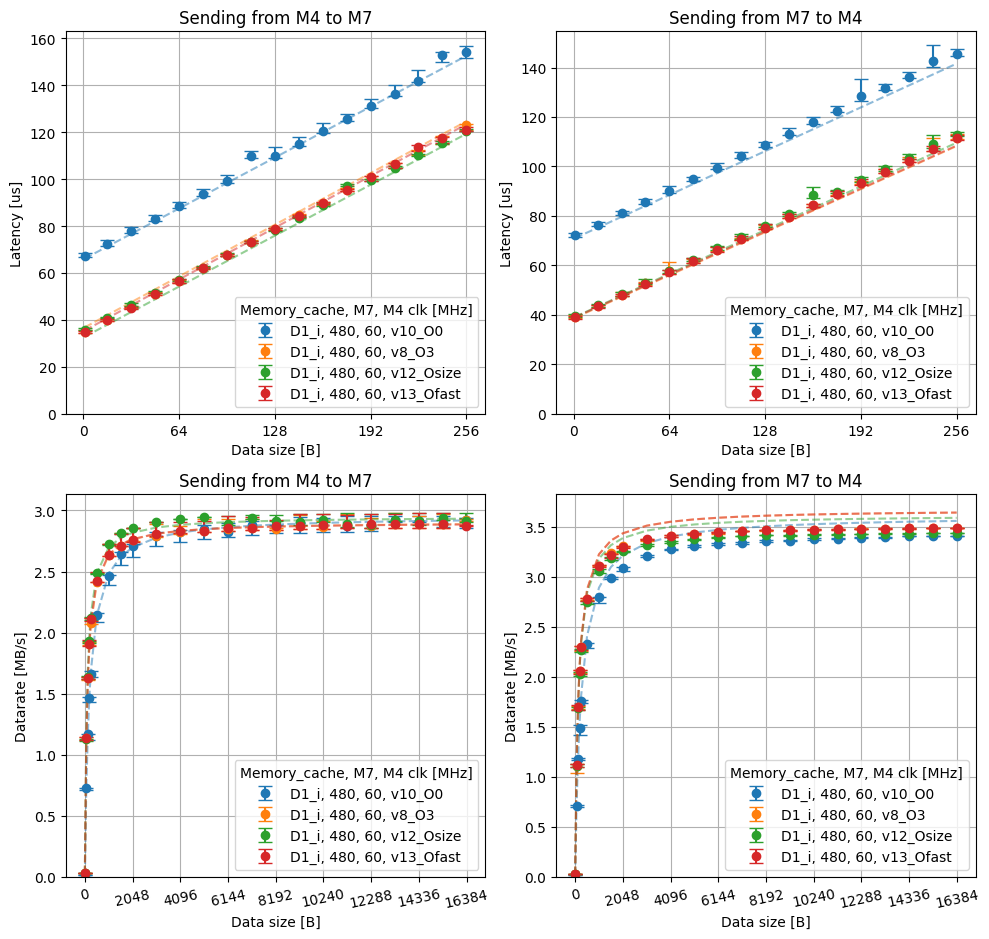

In [2]:
meas_configs = {
    # direction in loop
    'clkM7': [480],
    'clkM4': [60],
    'repeat': [256],
    # datasize in loop
    'mem': ['D1'],
    'cache': ['i'],
}
base_dirs = ['v10_O0', 'v8_O3', 'v12_Osize', 'v13_Ofast']

i = 0
plt.figure(figsize=(10, 9.5), layout='tight')
for meas_type, sizes in zip(['latency', 'datarate'], 
                            [sizes_short, sizes_long]):
    for direction in ['r', 's']:
        meas_configs['direction'] = direction
        meas_configs['datasize'] = sizes
        ax = plt.subplot(221 + i)
        if sizes == sizes_long:
            plt.xticks(np.arange(9)*2048, rotation=12)
        else:
            plt.xticks(np.arange(5)*64)
        visu.final_size_func_foreach(
            meas_configs, base_dirs, meas_type,
            if_model=True, if_mid_checkpoint=False)
        i = i + 1

### Change in clk

* size plot 4 regular plots for change in m4 and m7 as well


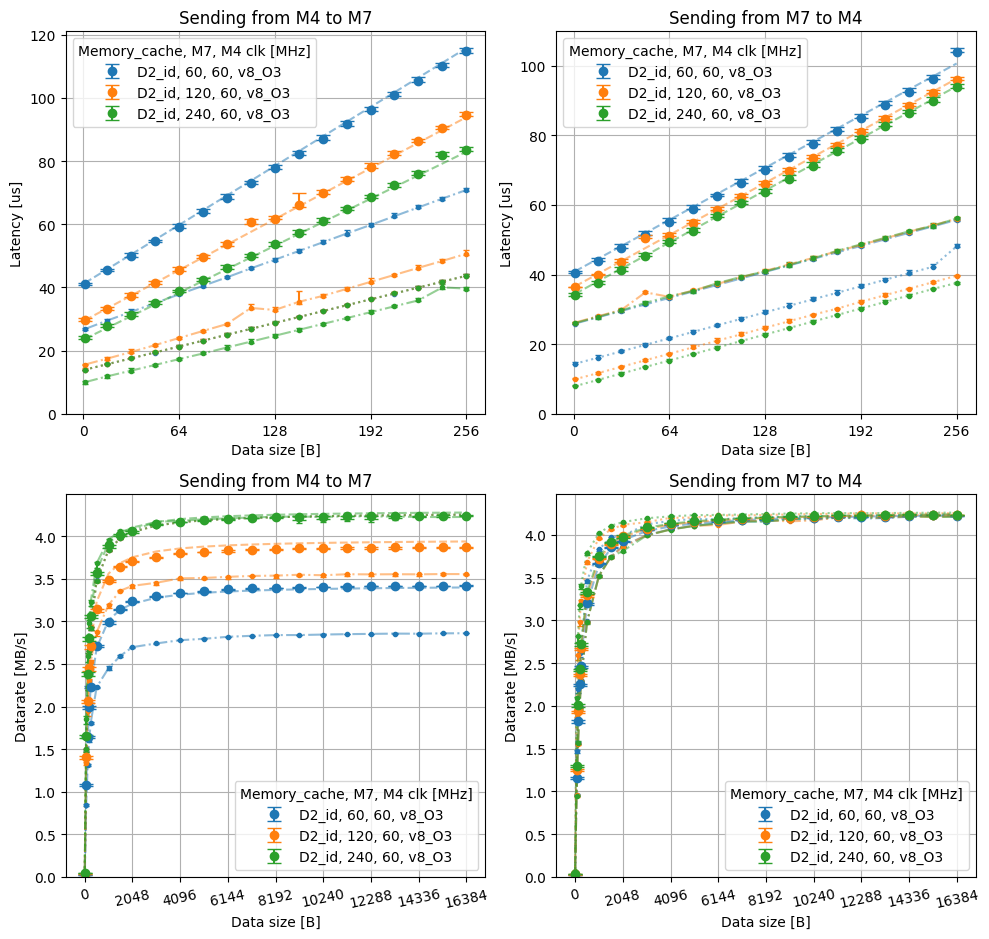

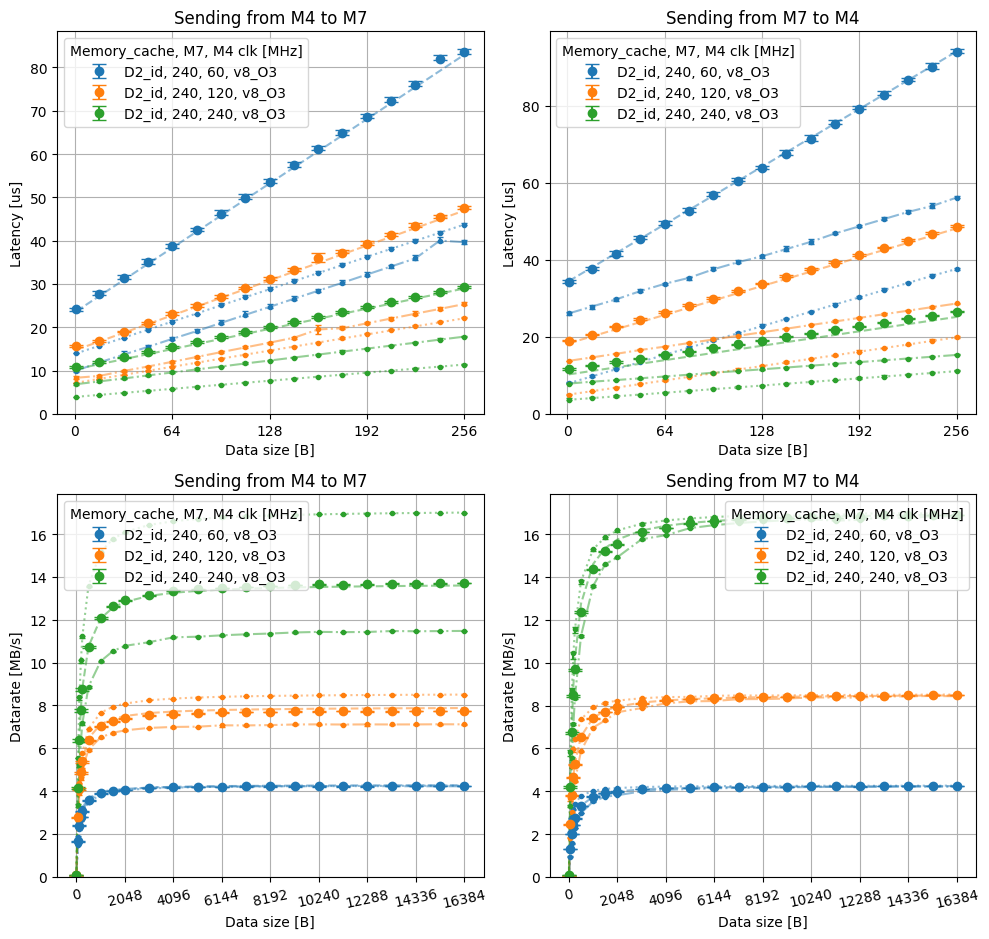

In [3]:
clkM7s = [[240, 120, 60], [240]]
clkM4s = [[60], [240, 120, 60]]
base_dirs = ['v8_O3']

meas_configs = {
    # direction in loop
    # clkM4 in loop
    # clkM7 in loop
    'repeat': [256],
    # datasize in loop
    'mem': ['D2'],
    'cache': ['id'],
}
for clkM7, clkM4 in zip(clkM7s, clkM4s):
    i = 0
    plt.figure(figsize=(10, 9.5), layout='tight')
    for meas_type, sizes in zip(['latency', 'datarate'], 
                                [sizes_short, sizes_long]):
        for direction in ['r', 's']:
            meas_configs['direction'] = direction
            meas_configs['datasize'] = sizes
            meas_configs['clkM4'] = clkM4
            meas_configs['clkM7'] = clkM7
            ax = plt.subplot(221 + i)
            if sizes == sizes_long:
                plt.xticks(np.arange(9)*2048, rotation=12)
            else:
                plt.xticks(np.arange(5)*64)
            visu.final_size_func_foreach(
                meas_configs, base_dirs, meas_type,
                if_model=True, if_mid_checkpoint=True)
            i = i + 1

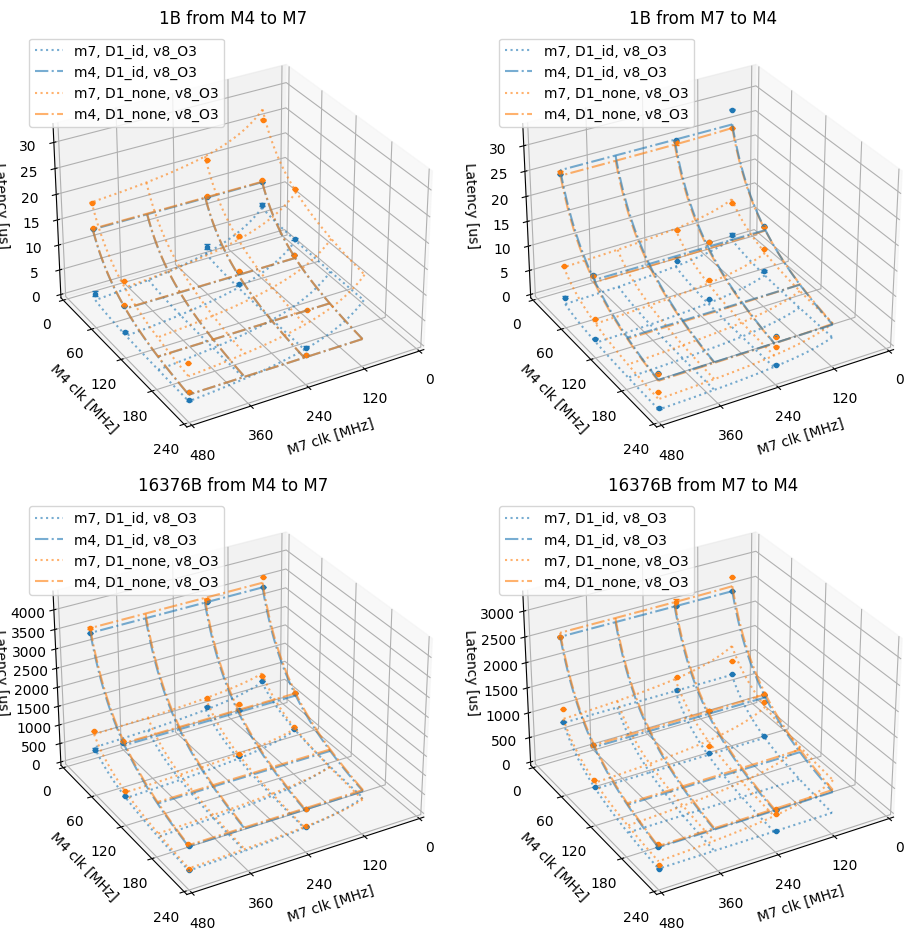

In [24]:
meas_configs = {
    # direction in loop
    'clkM7': [120, 240, 480],
    'clkM4': [60, 120, 240],
    'repeat': [256],
    # datasize in loop
    'mem': ['D1'],
    'cache': ['id', 'none'],
}
base_dir = 'v8_O3'
meas_type = 'latency'

i = 0
fig = plt.figure(figsize=(10, 9.5), layout='tight')
for datasize in [[1], [16376]]:
    for direction in ['r', 's']:
        meas_configs['direction'] = direction
        meas_configs['datasize'] = datasize
        ax = fig.add_subplot(221 + i, projection='3d')
        visu_3d.final3d_foreach(meas_configs, base_dir, meas_type, ax,
                                if_cut=False, linecount=3, if_meas=False,
                                if_mid_checkpoints=True)
        i = i + 1

### Difference between mems

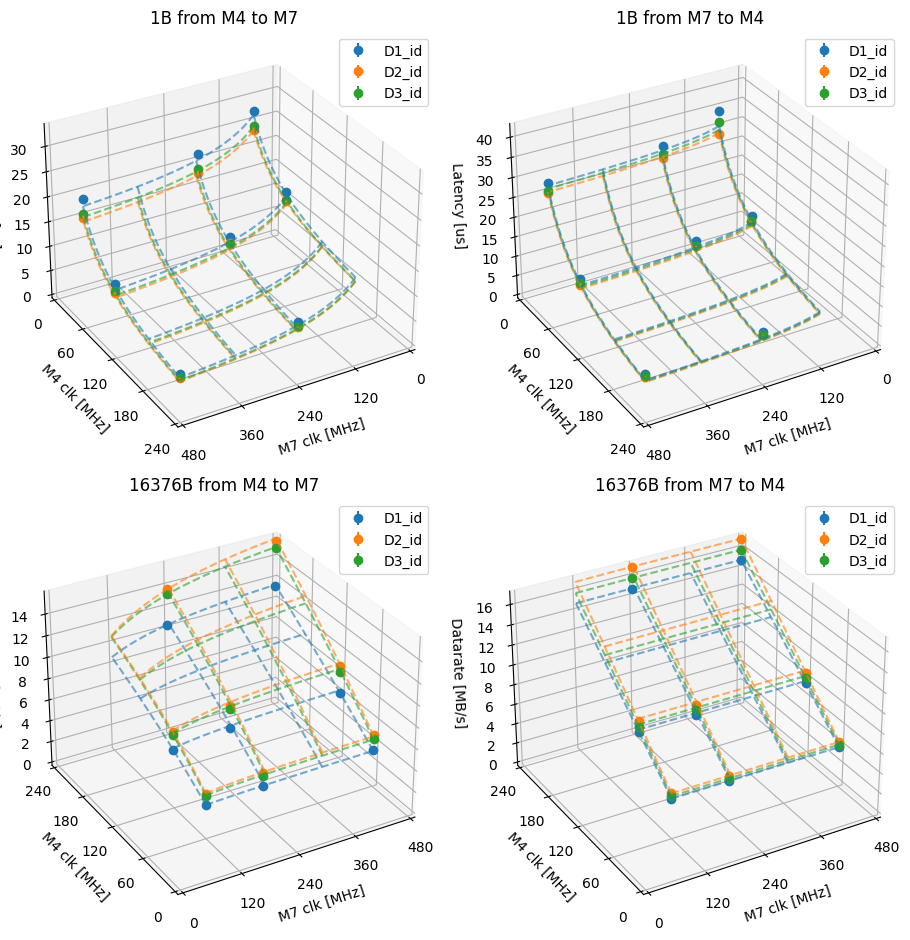

In [3]:
meas_configs = {
    # direction in loop
    'clkM7': [120, 240, 480],
    'clkM4': [60, 120, 240],
    'repeat': [256],
    # datasize in loop
    'mem': ['D1', 'D2', 'D3'],
    'cache': ['id'],
}
base_dir = 'v8_O3'

i = 0
fig = plt.figure(figsize=(10, 9.5), layout='tight')
for meas_type, datasize in zip(['latency', 'datarate'], [[1], [16376]]):
    for direction in ['r', 's']:
        meas_configs['direction'] = direction
        meas_configs['datasize'] = datasize
        ax = fig.add_subplot(221 + i, projection='3d')
        visu_3d.final3d_foreach(meas_configs, base_dir, meas_type, ax,
                                if_cut=False, linecount=3)
        i = i + 1

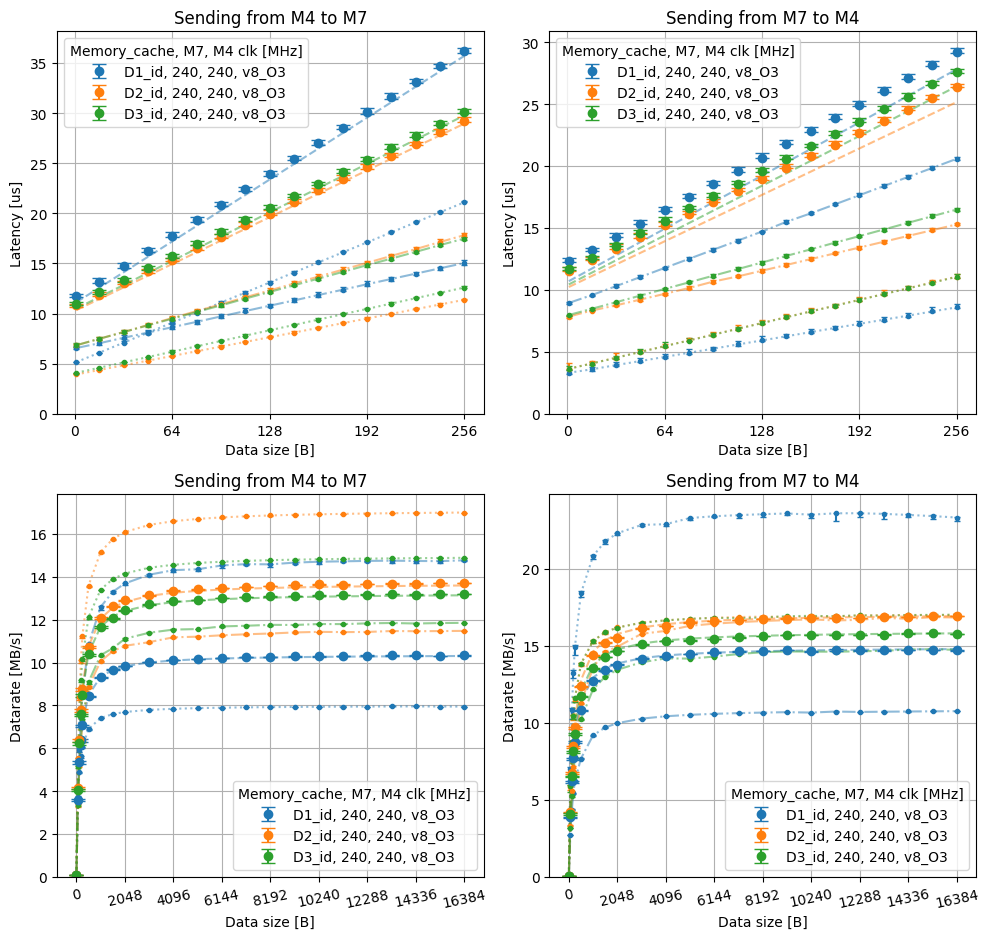

In [5]:
meas_configs = {
    # direction in loop
    'clkM7': [240],
    'clkM4': [240],
    'repeat': [256],
    # datasize in loop
    'mem': ['D1', 'D2', 'D3'],
    'cache': ['id'],
}
base_dir = 'v8_O3'

i = 0
plt.figure(figsize=(10, 9.5), layout='tight')
for meas_type, sizes in zip(['latency', 'datarate'], 
                            [sizes_short, sizes_long]):
    for direction in ['r', 's']:
        meas_configs['direction'] = direction
        meas_configs['datasize'] = sizes
        ax = plt.subplot(221 + i)
        if sizes == sizes_long:
            plt.xticks(np.arange(9)*2048, rotation=12)
        else:
            plt.xticks(np.arange(5)*64)
        visu.final_size_func_foreach(
            meas_configs, base_dirs, meas_type,
            if_model=True, if_mid_checkpoint=True)
        i = i + 1

### Difference between caches

On 3D, there is a small difference for D1 (large sizes), same as next plot, D2, D3 doesn't show much

Here with the D1 plot, it can be seen, how the two surfaces open up ((none, i) and (d, id))

These plots can be used only to check the correlation with the clock frequencies, then the size plots are more useful

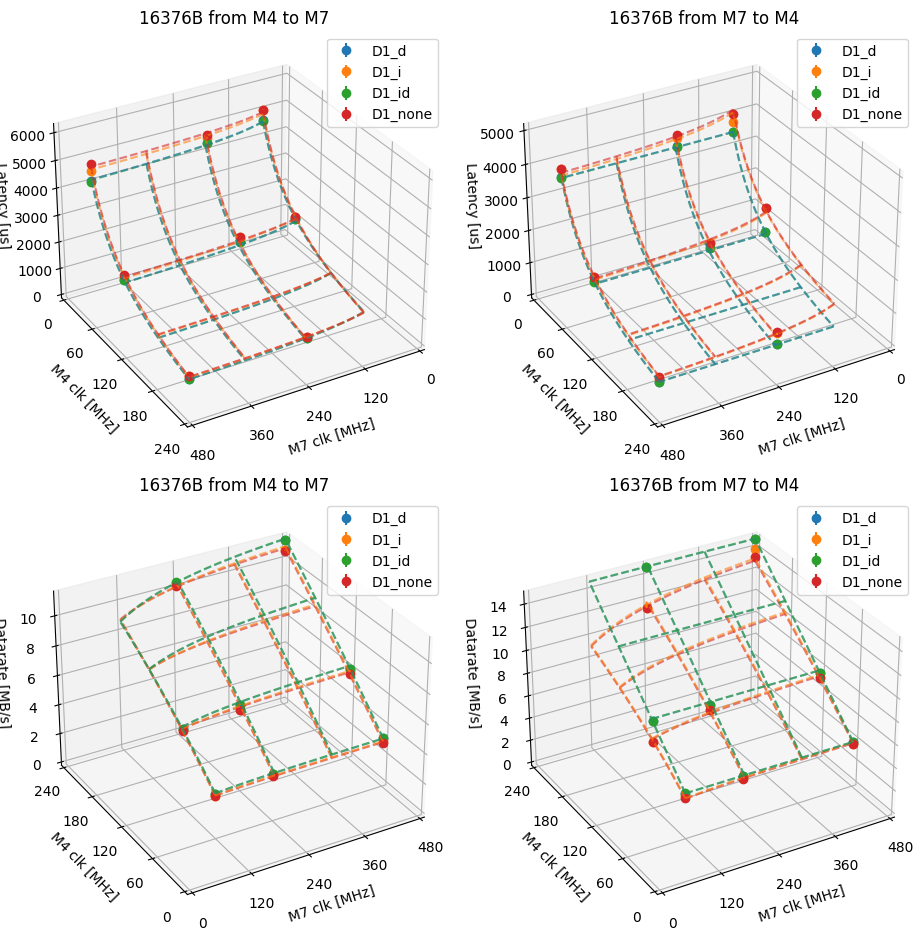

In [20]:
import visu_3d
import os
import matplotlib.pyplot as plt
from setup_paths import FIGURES_PATH
meas_configs = {
    # direction in loop
    'clkM7': [120, 240, 480],
    'clkM4': [60, 120, 240],
    'repeat': [256],
    'datasize': [16376],
    'mem': ['D1'],
    'cache': ['none', 'i', 'd', 'id'],
}
base_dir = 'v8_O3'
filename = 'memories_cache_3d.pdf'

i = 0
fig = plt.figure(figsize=(10, 9.5), layout='tight')
for meas_type in ['latency', 'datarate']:
    for direction in ['r', 's']:
        meas_configs['direction'] = direction
        ax = fig.add_subplot(221 + i, projection='3d')
        visu_3d.final3d_foreach(meas_configs, base_dir, meas_type, ax,
                                if_cut=False, linecount=3)
        i = i + 1
out = os.path.join(FIGURES_PATH, filename)
if not os.path.exists(out):
    plt.savefig(out)

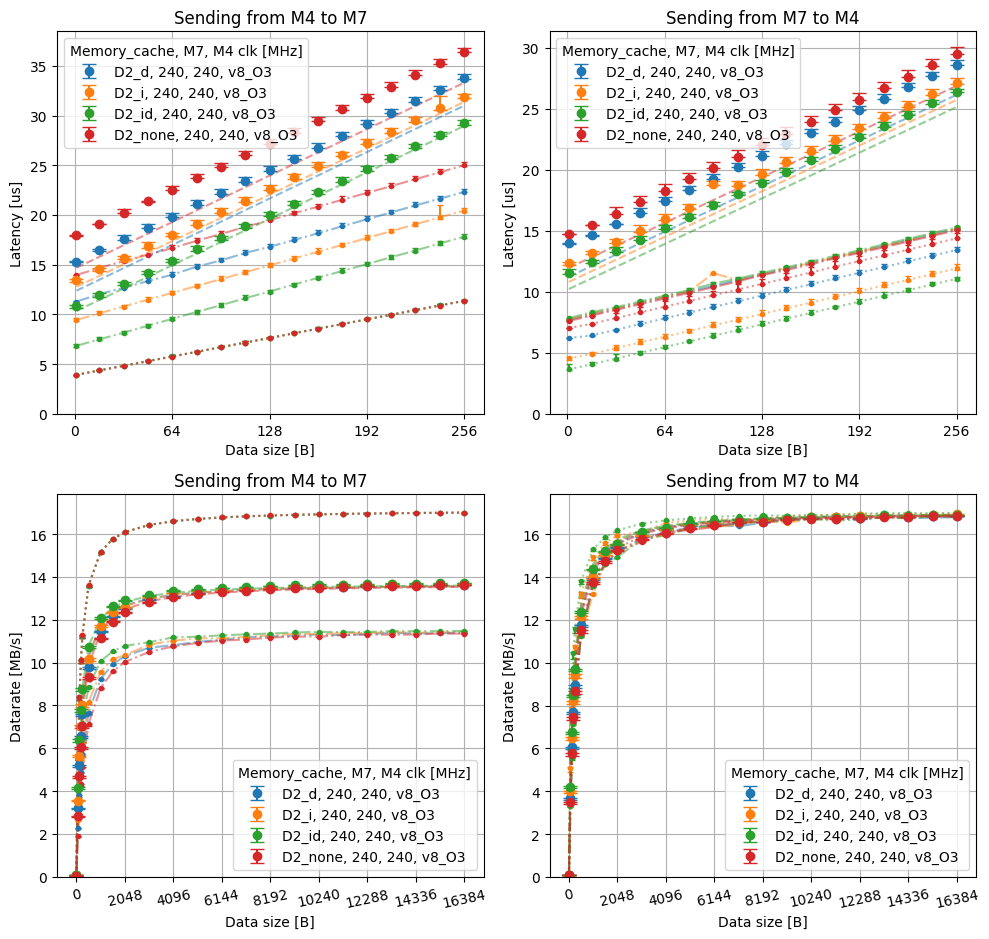

In [25]:
meas_configs = {
    # direction in loop
    'clkM7': [240],
    'clkM4': [240],
    'repeat': [256],
    # datasize in loop
    'mem': ['D2'],
    'cache': ['none', 'i', 'd', 'id'],
}
base_dirs = ['v8_O3']

i = 0
plt.figure(figsize=(10, 9.5), layout='tight')
for meas_type, sizes in zip(['latency', 'datarate'], 
                            [sizes_short, sizes_long]):
    for direction in ['r', 's']:
        meas_configs['direction'] = direction
        meas_configs['datasize'] = sizes
        ax = plt.subplot(221 + i)
        if sizes == sizes_long:
            plt.xticks(np.arange(9)*2048, rotation=12)
        else:
            plt.xticks(np.arange(5)*64)
        visu.final_size_func_foreach(
            meas_configs, base_dirs, meas_type,
            if_model=True, if_mid_checkpoint=True)
        i = i + 1

### Mem and cache configurations

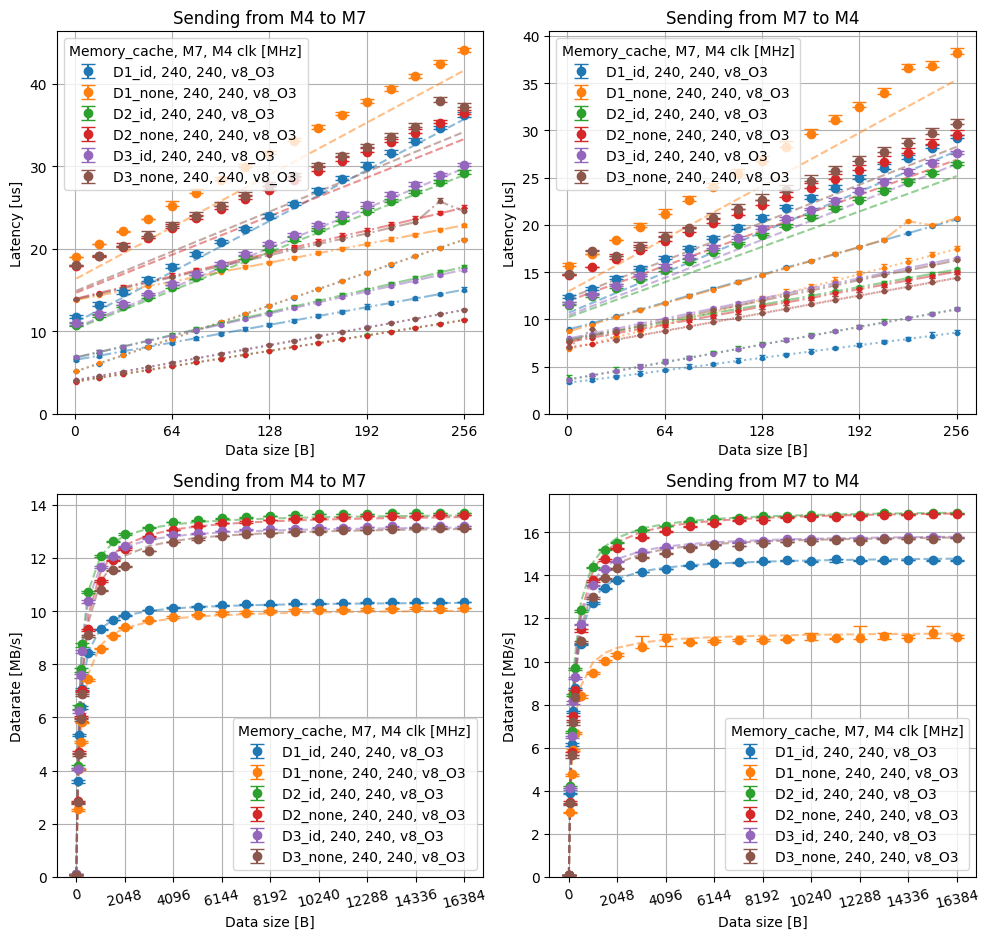

In [23]:
meas_configs = {
    # direction in loop
    'clkM7': [240],
    'clkM4': [240],
    'repeat': [256],
    # datasize in loop
    'mem': ['D1', 'D2', 'D3'],
    'cache': ['none', 'id'],
}
base_dir = 'v7_O3'

i = 0
plt.figure(figsize=(10, 9.5), layout='tight')
for meas_type, sizes in zip(['latency', 'datarate'], 
                            [sizes_short, sizes_long]):
    for direction in ['r', 's']:
        meas_configs['direction'] = direction
        meas_configs['datasize'] = sizes
        ax = plt.subplot(221 + i)
        if sizes == sizes_long:
            plt.xticks(np.arange(9)*2048, rotation=12)
        else:
            plt.xticks(np.arange(5)*64)
        visu.final_size_func_foreach(
            meas_configs, base_dirs, meas_type,
            if_model=True, if_mid_checkpoint=(meas_type=='latency'))
        i = i + 1

In [25]:
import os
import json
from setup_paths import MODELS_PATH

json_path = os.path.join(MODELS_PATH, 'v12_Osize', 'models_long.json')

def print_nesting(nest):
    print(' ' * 4 * nest, end='')

def print_nested(nest, *args, end='\n', sep=' '):
    print_nesting(nest)
    print(*args, end=end, sep=sep)

nest = 2
with open(json_path, 'r') as file:
    params = json.load(file)

for direction in ['r', 's']:
    dir_text = ('M4-M7' if direction=='r' else 'M7-M4')
    print_nested(nest, '\\midrule')
    print_nested(nest, dir_text + '& \\multicolumn{4}{ c }{}\\\\')
    print_nested(nest, '\\midrule')
    for mem in params:
        for cache in params[mem]:
            cache_text = ('without cache' 
                          if cache == 'none'
                          else f"with {str.upper(cache)} cache")
            print_nested(nest, f'{mem} {cache_text}', end=' & ')
            float_params = ['{:.2f}'.format(e) for e in params[mem][cache][direction]]
            print(*float_params, end='\\\\\n', sep=' & ')


        \midrule
        M4-M7& \multicolumn{4}{ c }{}\\
        \midrule
        D1 with D cache & 1470.39 & 4.31 & 18.81 & 1840.32\\
        D1 with I cache & 1568.26 & 3.58 & 19.89 & 1755.43\\
        D1 with ID cache & 1418.89 & 4.33 & 18.80 & 1304.65\\
        D1 without cache & 1416.47 & 3.24 & 20.23 & 2468.44\\
        D2 with D cache & 1466.36 & 4.27 & 12.98 & 1624.83\\
        D2 with I cache & 1484.93 & 4.21 & 12.99 & 1653.68\\
        D2 with ID cache & 1453.62 & 4.23 & 12.98 & 1100.12\\
        D2 without cache & 1457.24 & 4.29 & 12.97 & 2186.66\\
        D3 with D cache & 1398.82 & 4.35 & 13.78 & 1687.33\\
        D3 with I cache & 1385.31 & 4.37 & 13.75 & 1747.89\\
        D3 with ID cache & 1379.25 & 4.35 & 13.77 & 1183.97\\
        D3 without cache & 1380.03 & 4.37 & 13.76 & 2266.80\\
        \midrule
        M7-M4& \multicolumn{4}{ c }{}\\
        \midrule
        D1 with D cache & 633.06 & 0.01 & 16.08 & 2245.28\\
        D1 with I cache & 817.17 & 4.53 & 16.00 & 2233